# Analyse des données d'expérience

Expérience: J7 Energie Solaire, expérience 1

Date: 2023-10-01

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from options import *

In [3]:
rawdata = np.loadtxt("../data/Igamma(d).csv", dtype=float, delimiter=",", skiprows=1)
PgammaS = np.loadtxt("../data/Pgamma(d).csv", dtype=float, delimiter=",", skiprows=1)
Pgamma = PgammaS * 0.01

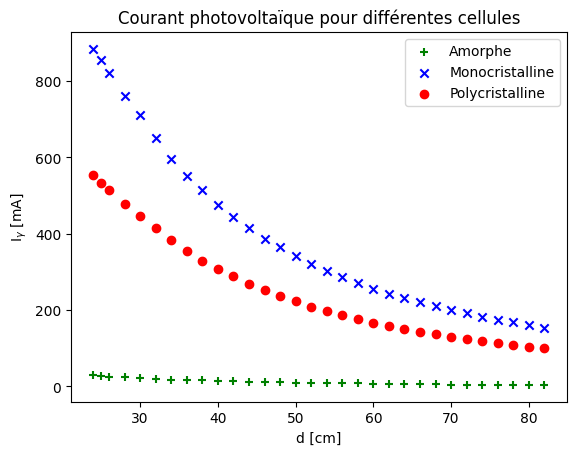

In [4]:
plt.scatter(rawdata[:,0], rawdata[:,1], color=colors["A"], marker="+", label="Amorphe")
plt.scatter(rawdata[:,0], rawdata[:,2], color=colors["M"], marker="x", label="Monocristalline")
plt.scatter(rawdata[:,0], rawdata[:,3], color=colors["P"], label="Polycristalline")
plt.xlabel("d [cm]")
plt.ylabel("I$_\gamma$ [mA]")
plt.title("Courant photovoltaïque pour différentes cellules")
plt.legend()

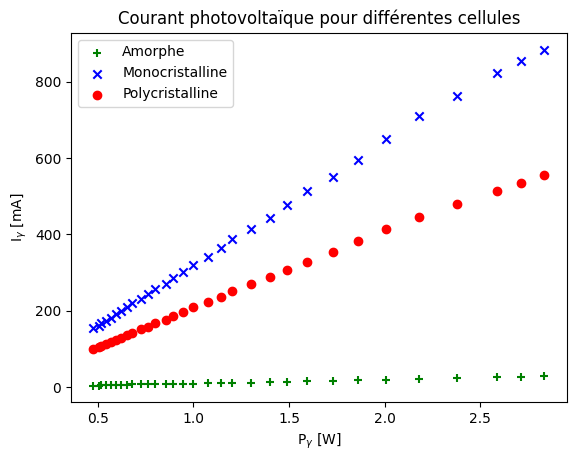

In [5]:
plt.scatter(Pgamma[:,1], rawdata[:,1], color=colors["A"], marker="+", label="Amorphe")
plt.scatter(Pgamma[:,1], rawdata[:,2], color=colors["M"], marker="x", label="Monocristalline")
plt.scatter(Pgamma[:,1], rawdata[:,3], color=colors["P"], label="Polycristalline")
plt.xlabel("P$_\gamma$ [W]")
plt.ylabel("I$_\gamma$ [mA]")
plt.title("Courant photovoltaïque pour différentes cellules")
plt.legend()

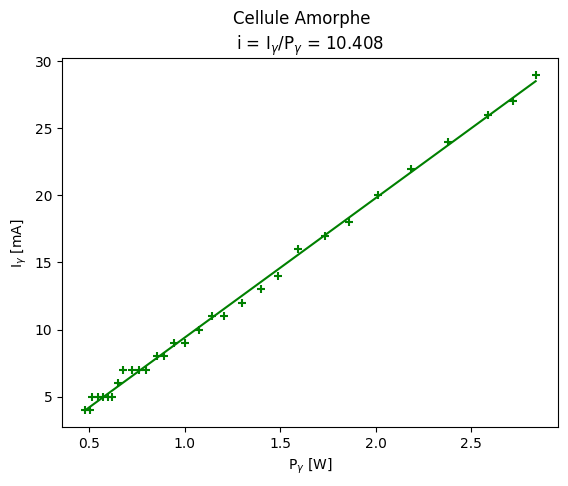

In [6]:
coefs_A = np.polyfit(Pgamma[:,1], rawdata[:,1], 1)
fit_A = np.poly1d(coefs_A)

plt.scatter(Pgamma[:,1], rawdata[:,1], color=colors["A"], marker="+")
plt.xlabel("P$_\gamma$ [W]")
plt.ylabel("I$_\gamma$ [mA]")
plt.suptitle("Cellule Amorphe")
plt.title(f"i = I$_\gamma$/P$_\gamma$ = {round(coefs_A[0],3)}")

plt.plot(Pgamma[:,1], fit_A(Pgamma[:,1]), color=colors["A"])

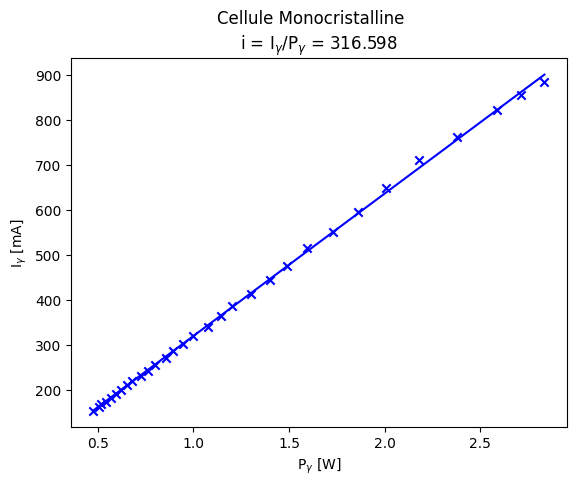

In [8]:
coefs_M = np.polyfit(Pgamma[:,1], rawdata[:,2], 1)
fit_M = np.poly1d(coefs_M)

plt.scatter(Pgamma[:,1], rawdata[:,2], color=colors["M"], marker="x")
plt.xlabel("P$_\gamma$ [W]")
plt.ylabel("I$_\gamma$ [mA]")
plt.suptitle("Cellule Monocristalline")
plt.title(f"i = I$_\gamma$/P$_\gamma$ = {round(coefs_M[0],3)}")

plt.plot(Pgamma[:,1], fit_M(Pgamma[:,1]), color=colors["M"])

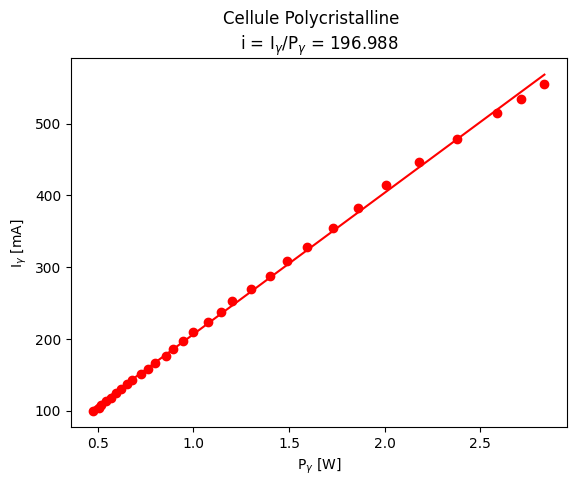

In [9]:
coefs_P = np.polyfit(Pgamma[:,1], rawdata[:,3], 1)
fit_P = np.poly1d(coefs_P)

plt.scatter(Pgamma[:,1], rawdata[:,3], color=colors["P"])
plt.xlabel("P$_\gamma$ [W]")
plt.ylabel("I$_\gamma$ [mA]")
plt.suptitle("Cellule Polycristalline")
plt.title(f"i = I$_\gamma$/P$_\gamma$ = {round(coefs_P[0],3)}")

plt.plot(Pgamma[:,1], fit_P(Pgamma[:,1]), color=colors["P"])